In [32]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [33]:
(x_data, _), (_, _) = cifar10.load_data()

In [34]:
x_data = x_data.reshape((len(x_data), 32, 32, 3))
x_train, x_temp, _, _ = train_test_split(x_data, x_data, test_size=0.2, random_state=42)
x_val, x_test, _, _ = train_test_split(x_temp, x_temp, test_size=0.5, random_state=42)

x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [35]:
input_img = Input(shape=(32, 32, 3))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# At this point, the representation is (8, 8, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [36]:
history = autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_val, x_val)) 

Epoch 1/10
313/313 [==============================] - 43s 134ms/step - loss: 0.5830 - val_loss: 0.5650
Epoch 2/10
313/313 [==============================] - 43s 139ms/step - loss: 0.5651 - val_loss: 0.5611
Epoch 3/10
313/313 [==============================] - 41s 131ms/step - loss: 0.5628 - val_loss: 0.5592
Epoch 4/10
313/313 [==============================] - 41s 131ms/step - loss: 0.5615 - val_loss: 0.5581
Epoch 5/10
313/313 [==============================] - 42s 133ms/step - loss: 0.5605 - val_loss: 0.5584
Epoch 6/10
313/313 [==============================] - 42s 133ms/step - loss: 0.5598 - val_loss: 0.5567
Epoch 7/10
313/313 [==============================] - 41s 132ms/step - loss: 0.5593 - val_loss: 0.5572
Epoch 8/10
313/313 [==============================] - 42s 133ms/step - loss: 0.5589 - val_loss: 0.5558
Epoch 9/10
313/313 [==============================] - 40s 128ms/step - loss: 0.5584 - val_loss: 0.5557
Epoch 10/10
313/313 [==============================] - 41s 131ms/step - l

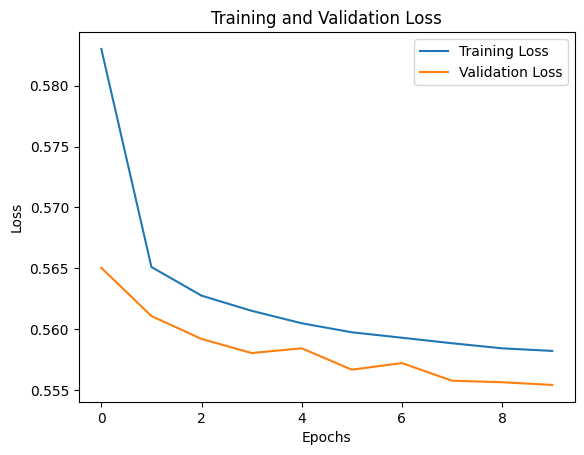

In [37]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

157/157 [==============================] - 1s 9ms/step


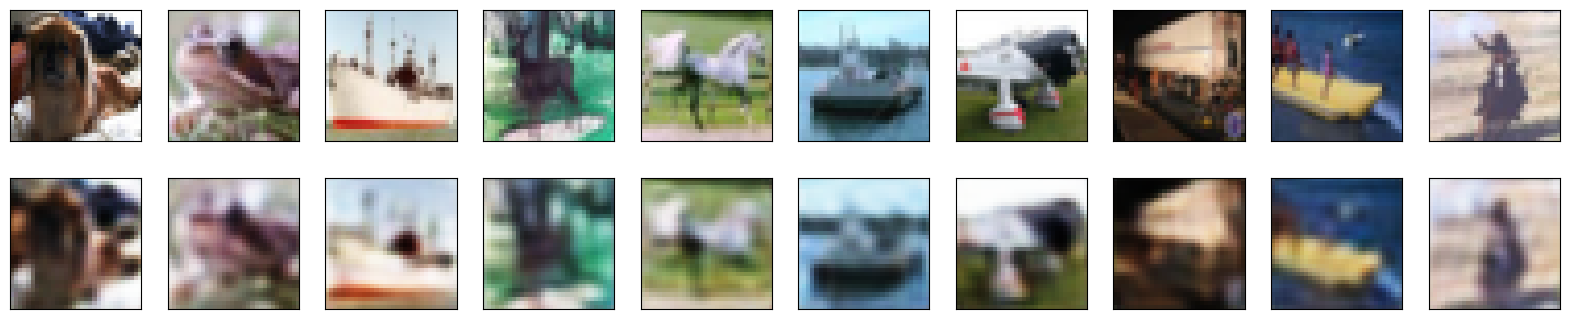

In [38]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()